In [1]:
### 1 ### access the file

#TODO: access the file directly in s3 (need aws access key & secret access key)

import json
with open('data/part-00000.dms') as json_file:
    json_data = []
    for line in json_file:
        json_data.append(json.loads(line))
with open("data/2019-06-27.10_00_59_059.full.Program.json") as f:
    id_name_lookup = {}
    for line in f:
        info = json.loads(line)
        id_name_lookup[info["_id"]] = info

FileNotFoundError: [Errno 2] No such file or directory: 'data/part-00000.dms'

In [2]:
print("number of data points: ",len(json_data))

NameError: name 'json_data' is not defined

In [70]:
### 2 ### clean data and insert program names

def Clean_Data(data):
    # get rid of duplicate queires
    check_list = set()
    for each in range(len(data)):
        new_list = []
        for query in data[each]:
            if 'trx' in query:
                if query['trx'] not in check_list:
                    new_list.append(query)
                    check_list.add(query['trx'])
            else:
                new_list.append(query)
        data[each] = new_list
Clean_Data(json_data)

In [304]:
print(json_data[0])

[{'trx': 'faaa6bdb-2550-4527-bb33-fd7e7e167183', 'transcription': 'YouTube', 'response': [{'agentName': 'tv', 'response': {'jsonResponse': {'cacheTtl': '300000', 'lang': 'eng', 'originalText': 'YouTube', 'response': [{'priorityOfRuleApplied': 12, 'parameters': {'score': '1.0', 'availability': True, 'relevance': '1.0', 'deviceType': 'all', 'voiceSuggestion': 'true'}, 'score': '1.0', 'availabilityCheckNeeded': False, 'action': 'YOUTUBE', 'selectionRuleApplied': 'YOUTUBE', 'domain': 'TV', 'debug': {'entityScore': 1.0, 'converted': 'false', 'generatedQuery': 'youtube', 'pattern': 'youtube _end', 'patternScore': 1.0, 'clickrankScore': 1.0}, 'maxScore': False, 'nlpSource': 'ENLP', 'relevanceRatio': 0}], 'partner': 'comcast', 'text': 'youtube', 'version': 'REL-7.12.8', 'deviceType': 'xr11', 'nlpSource': 'ENLP'}, 'cached': True, 'responseTime': 979, 'failed': False, 'responseTimeSelector': 977}}, {'agentName': 'customer_care', 'response': {'jsonResponse': {'cacheTtl': '300000', 'nlpSource': 'E

In [72]:
arr = [len(x) for x in json_data]
avg_len = sum(arr)/len(json_data)
print("average query per instance: %f"%(avg_len-1))

average query per instance: 1.067750


In [73]:
count = 0
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    programid = instance[n]["programId"]
    if programid in id_name_lookup:
        count += 1
        json_data[i][n]["programName"] = id_name_lookup[programid]["_source"]["name"]
        print(id_name_lookup[programid]["_source"]["name"])
    else:
        json_data[i][n]["programName"] = ""

Action News 6PM
7 News Today in New England
FPJ's Ang Probinsyano
NBA: The Jump
The Front Runner
Daybreak at 7am
Love & Other Drugs
The Wood
The X-Files: I Want to Believe
SportsCenter
2019 BET Awards
2019 BET Awards
FOX2 News Morning: The Nine
The Wedding Singer
A Walk Among the Tombstones
A Walk Among the Tombstones
Music Choice Solid Gold Oldies
7 Action News at 5pm
2019 BET Awards
Public Access
Moana
Eight Below
Ratatouille
Los tres mosqueteros
María Mercedes
Doña Flor y sus dos maridos
CBS 13 News at 4p
2019 BET Awards
The Last Bridesmaid
Run All Night
Boxing
The Golf Scene
Have Thinning Hair? Keranique Can Help Regrow Beautiful, Thicker Hair!
Lilo & Stitch
Paid Programming
2019 BET Awards
A Star Is Born
Never Play Dead
2019 BET Awards
Tarzan
Moana
Contacto Deportivo UDN
Sin tu mirada
10 Cloverfield Lane
The Incredibles
NewsCenter 5 at 6:00
Play Time with Al
TV-3 News Daybreak
Abhi To Main Jawan Hoon
WREG News Channel 3 at Noon
WMC Action News 5 at 5:00PM
The Godfather
Dudley Do-R

The Weather Channel LIVE
KATU News at 6
New York Yankees Pregame
Toy Story
Mad Dog and Glory
2019 BET Awards
2019 New York Yankees Old-Timers' Day Special
Wayne's World
Good Day Atlanta 9:00am
The Q
Toy Story 2
WBZ News 5:30p
2019 BET Awards
Toy Story 2
NBC 6 South Florida News at 11pm
2019 BET Awards
America's Greatest Animals
To Have and to Hold
A Good Day to Die Hard
22 Jump Street
Bloomberg Daybreak: Americas
News 12 New Jersey
The Catcher Was a Spy
WCCO 4 News at Six
2019 BET Awards
Hidden Figures
16 Shots
WNBA Basketball
The Age of Adaline
Boxing
MLB Baseball
The Hate U Give
Moana
WGN Evening News
Outside the Lines
Toy Story
Línea de Cuatro
Toy Story 2
Newswatch 16 This Morning
Apollo 11
The Weather Channel LIVE
MLB Baseball
The LEGO Batman Movie
TV Patrol Linggo
Naked Gun 33 1/3: The Final Insult
The Adventures of Sharkboy and Lavagirl
2019 BET Awards
Hidden Figures
Shark APEX DuoClean Zero-M Powered Lift-Away Vacuum - Say Goodbye to Tangled Brush Rolls!
Larry King Special Repor

2019 BET Awards
Ready Jet Go!: One Small Step
2019 BET Awards
10 Cloverfield Lane
ABC 7 News at 5:00
Gotye: Somebody That I Used To Know
Five for Fighting: Superman (It's Not Easy)
ABC 7 News at 5:00
Deadpool
AM Style With Leah Williams
American Made
The Weather Channel LIVE
It's Showtime
Epic.Awesome.Videos
9News at 4:00 O'Clock
Noticias 41 Al Despertar
Boxing
Mercy Ships
Valentine's Day
Good Morning Football
KOMO 4 News Sunday 5:00pm
Kerstin's Closet
KTVU Mornings on 2 at 9am
Suze Orman's Financial Solutions for You
Never Say Never Again
Boxing
The Weather Channel LIVE
My Blue Heaven
Toy Story 2
Music Choice Love Songs
Music Choice Love Songs
Paid Programming
Alvin and the Chipmunks: The Squeakquel
A Star Is Born
Insidious: Chapter 2
Highwire Live in Times Square With Nik Wallenda
2019 BET Awards
NFL Live
Style Scene
Wedding Bells
Try Magvantage High Efficiency Today!
Boxing
Noticiero Univisión: Fin de Semana
Den of Thieves
13 Eyewitness News at 6PM
Porque el amor manda
Venga Tu Rein

Alec Benjamin: Let Me Down Slowly
Joel Osteen
Programa pagado
Psycho Brother-In-Law
NewsCenter 5 at 4:30
Paris, Wine & Romance
First Take
Apollo 11
NFL Live
Guardians of the Galaxy
Jurassic Park
Supercarrier: USS Ronald Reagan
Lilo & Stitch
Highwire Live in Times Square With Nik Wallenda
Quick Pitch
Boston 25 Morning News at 7AM
La Bamba
2019 BET Awards
Squawk Box
The LEGO Batman Movie
SportsCenter
Jurassic Park
Frozen
CBS 2 News at 5PM
Hacksaw Ridge
New Leash on Life: The K9s for Warriors Story
Alvin and the Chipmunks: The Squeakquel
Toy Story
SportsCenter
Tyler Perry's Madea Goes to Jail
Volcano
Cooking with Emeril!
The Wood
Apollo 11
Paid Programming
Highwire Live in Times Square With Nik Wallenda
MLB Baseball
Girl Crazy
Hacksaw Ridge
Highwire Live in Times Square With Nik Wallenda
The Sandlot
On the Story
News 12 New Jersey
NewsCenter 5 at Noon
SportsCenter
America This Morning
Joel Osteen
Alvin and the Chipmunks: The Squeakquel
What's Love Got to Do With It
First Coast News at 6
G

The Rundown
A League of Their Own
Moana
Dances With Wolves
Captain America: Civil War
Viva la tarde
10 Cloverfield Lane
Fletch
KTVU Mornings on 2 at 9am
Kingsman: The Secret Service
Alvin and the Chipmunks: The Squeakquel
7 News at Noon
Momentum Generation
A Good Day to Die Hard
2019 BET Awards
How to Train Your Dragon: The Hidden World
2019 BET Awards
Hot Topics
11 News at 4:30 AM
Get Up
8 News at 5:30PM
The General's Daughter
Twin Cities Live
AAU Junior National Volleyball Championships
The Wood
2019 BET Awards
The Weather Channel LIVE
ABC7 On Your Side
Yard Revolution 2019
SportsCenter
FOX2 News: Live at 11am
When Whales Walked: Journeys in Deep Time
IndyCar Series Post Race
News 4 Tucson at 4pm
Kerstin's Closet
Downton Abbey Returns!
Music Choice Rock
The Old Man & the Gun
Cindy Crawford and Ellen Pompeo share secrets
First Take
WMC Action News AM at 6AM
Fútbol Central
WGN Morning News
SportsCenter
First Take
Creflo Dollar
Buzz TV: The Jacksonville Buzz
Alvin and the Chipmunks: The

Fifty Shades Freed
Highwire Live in Times Square With Nik Wallenda
MLB Extra Innings
2019 BET Awards
KSLA News 12 at 10PM Sunday
In the Army Now
Burlesque
Burlesque
Laura
Truth or Dare
NBC 2 News at 3
SportsCenter
Hoy
NFL Live
2019 BET Awards
A Walk Among the Tombstones
The Howie Carr Show
New Day Northwest
NFL Live
República Deportiva
The Forgotten
Music Choice '70s
Music Choice '70s
SportsCenter
ABC7 News 6:00PM
Inside PBC Boxing
I Feel Pretty
Song & Scripture
21 Jump Street
Logan
LOGO by Lori Goldstein
The General's Daughter
Self/less
Breezies Intimates Collection
MLB Baseball
The Age of Adaline
Fox 43 Morning News at 8:00am
Porque el amor manda
13 Eyewitness News at 5:30am
13 Eyewitness News at 11am
13 Eyewitness News at 4PM
Miles Lord: Minnesota's Maverick Judge
HTown Rush at 5am
Zero Dark Thirty
Music Choice Smooth Jazz
The Road to Miami With Ari Melber
Mighty Joe Young
Jurassic Park
Music Choice Solid Gold Oldies
2019 BET Awards
White Boy Rick
The Weather Channel LIVE
A Good Day

Weather Underground
The Incredibles
Constantine
Magic Mike XXL
Toy Story 2
What's Love Got to Do With It
Morning Express With Robin Meade
Hidden Figures
La Gata
The Rundown
Eyewitness News This Morning
New York Yankees Pregame
News Features
Kerstin's Closet
America's Greatest Animals
Norbit
Heart for the World
Underworld
Cindy Crawford and Ellen Pompeo share secrets
The Town
Susan Graver Style
Bad Times at the El Royale
Guardians of the Galaxy
Jack Reacher
Paris, Wine & Romance
Jurassic Park
2019 BET Awards
Moonlight in Vermont
Alvin and the Chipmunks: The Squeakquel
Get Up
NBC Connecticut News at 5
Constantine
Good Day Philadelphia
Panorama Mundial
The Exchange
Bloomberg Markets: Balance of Power
SportsCenter
Cooking with Emeril
NFL Live
ABC7 News 4:00PM
Moana
WPBF 25 News at 5:00 PM
A Bug's Life
2019 BET Awards
Jaws the Revenge
Sin tu mirada
Alvin and the Chipmunks: The Squeakquel
2019 BET Awards
Isn't It Romantic
Nevada Smith
The Jayhawkers
CBS 2 News at 6:30P
News 12 New Jersey
Dem

Wonder Park
2019 BET Awards
FOX 61 News at 4
Moana
Toy Story 2
The Post
KPRC Channel 2 News Today at 5:30am
Epic.Awesome.Videos
Action News 11 PM
BET Rejoices: Showdown of Faith
WRDE News
Last Chance Cafe
The Weather Channel LIVE
World Poker Tour
The Naked Gun: From the Files of Police Squad!
Moana
Frozen
Camila Cabello Feat. Young Thug: Havana
Frozen
Music Choice Contemporary Christian
Teen Beach 2
Weather Underground
A Novel Romance
Boxing
Catch Me if You Can
AM Northwest
You Don't Mess With the Zohan
NHL Tonight
2019 BET Awards
Fast Money Halftime Report
Music Choice Soft Rock
Outside the Lines
Squawk Box
Action News 5PM
SportsCenter
La Rosa de Guadalupe
Ventaneando
AM Style With Leah Williams
Blended
Deadwood: The Movie
Squawk Box
ASAP
Sin tu mirada
KPRC Channel 2 News Today at 6am
On the Story
24 Oras
24 Oras
Lethal Weapon 4
Inside the Bears
Inside the Bears
Ch. 7 News at 5:30
Just Wright
FOX2 News Morning: The Nine
2019 BET Awards
KTVU FOX 2 News at Noon
Never Play Dead
Boxing
To

2019 BET Awards
KHOU11 Sports Extra
Apollo 11
Mommy's Little Angel
Vecinos
2019 BET Awards
A Bridge Too Far
A Bridge Too Far
The Age of Adaline
Moana
Try Magvantage High Efficiency Today!
Creflo Dollar
CBS Overnight News
A Novel Romance
Acceso total
Wicked Moms Club
Music Choice Teen Beats
Noticiero Telemundo Houston
Pirate Radio
Pro Football Talk
Noticias Telemundo Fin de Semana
Jaws
A Novel Romance
Highwire Live in Times Square With Nik Wallenda
The 47abc News Hour
Bride of Chucky
Music Choice Soundscapes
La Gata
La Gata
La Rosa de Guadalupe
The Three Musketeers
5 Eyewitness News at 5:00AM
2019 BET Awards
Paris, Wine & Romance
Tarzan
Unang Hirit
Local 10 News at 6PM
First Take
Easy Solutions
Mi Pueblo por Dentro
Alvin and the Chipmunks: The Squeakquel
2019 BET Awards
Vecinos
Arena Football
SportsCenter
2019 BET Awards
Apollo 11
2019 BET Awards
The Old Man & the Gun
A Star Is Born
La Gata
ABC7 Eyewitness News at 6am
22 Jump Street
The Wood
2019 BET Awards
Baby Driver
KARE 11 News at 1

AM Style With Leah Williams
Taps
Organic Whole Food Nutrition, delivered right to your door!
Chéri
Alvin and the Chipmunks: The Squeakquel
Justice
Easy Solutions
The Wood
2019 BET Awards
2019 BET Awards
Match Game
2019 BET Awards
Noticiero Telemundo Houston
The Longest Yard
NuWave Bravo XL Smart Countertop Air Fryer Convection Oven
Toy Story 2
AMHQ
Alvin and the Chipmunks: The Squeakquel
The Hate U Give
Insidious: Chapter 3
Tempting Fate
WSLS 10 at 7
PIX11 News at Ten
Music Choice Pop Hits
Pop Royalty
Porque el amor manda
Highwire Live in Times Square With Nik Wallenda
Tami Ever After
Local 10 News at 4PM
Jurassic Park
KPRC Channel 2 News Midday
Worldwide Exchange
Play Time with Al
Quick Pitch
Honeysuckle Rose
Apollo 11
Local 10 News at 5PM
Apollo 11
American Dirt Blasters: WORX HydroShot
Nosotros los guapos
Taps
The Old Man & the Gun
UEFA Under-21 Championship 2019
Transición
Ghost World
SportsCenter
The Old Man & the Gun
Live 5 News at 6a
NBC 10 News at 5p
Korn's Brian Head Welch: Lo

NBA: The Jump
WCCO 4 News This Morning at 6
FOX 9 Morning at 7AM
5 Eyewitness News at 6:30
Good Morning Football
Jurassic Park
Heist
The Godfather
Hollow Man 2
MLB Baseball
Highly Questionable
Weather Underground
Moonlight in Vermont
The Amityville Horror
KTVU FOX 2 News at Noon
2019 BET Awards
Local Programming Ch. 2
2019 BET Awards
The General's Daughter
A Walk Among the Tombstones
The Perfect Daughter
Total Recall
Alvin and the Chipmunks: The Squeakquel
WGN Weekend News at Nine
Alvin and the Chipmunks: The Squeakquel
MLB Baseball
7 News at 6:30PM
The Core
Despierta con Carlos Loret de Mola
Fox 13 News Live at Eleven
Guardians of the Galaxy
KARE 11 News at 4pm
Fletch Lives
Music Choice Contemporary Christian
Dancer's Body Secret
2019 BET Awards
Jalen & Jacoby
From Here to Eternity
MLB Baseball
Boxing
FOX 2 News Morning
Highwire Live in Times Square With Nik Wallenda
Get Up
Tummy Tuck: Miracle Nonsurgical Discovery Melts Away Belly Fat
SportsCenter
The Miseducation of Cameron Post
Coo

Smallfoot
2019 BET Awards
Into the Blue
The Game Plan
2019 BET Awards
Bone Thugs-n-Harmony: East 1999
Indy Style
Por mis bigotes
The Last Seduction
Contacto Deportivo
Smokin' Aces
Hoy en la Copa América Brasil 2019
Al punto
La Gata
AMHQ
La Última Palabra
2019 BET Awards
2019 BET Awards
Squawk Box
NBC 2 News at Noon
NBC 2 News at Six
2019 BET Awards
Blue Streak
Kidnapped: The Hannah Anderson Story
Morning Express With Robin Meade
Lil Durk Feat. Young Dolph & Lil Baby: Downfall
Lil Durk Feat. Young Dolph & Lil Baby: Downfall
Telenoticias 21
Another Stakeout
Run All Night
Airbrush Makeup the Art of Beauty
Vida y salud
Up
NewsChannel 5 at 5:30
Get Rich or Die Tryin'
Get Rich or Die Tryin'
Horrible Bosses 2
A Good Day to Die Hard
Mama & Me: Sing Along
Highwire Live in Times Square With Nik Wallenda
2019 BET Awards
Child's Play
The Croods
Monsters University
The Town
Rick Steves Special: The Holy Land, Israelis and Palestinians Today
WGN Early Evening News
Hoy
Paralelo 23
SportsCenter
High N

Paris, Wine & Romance
2019 BET Awards
The Lion King
Smokin' Aces
Paris, Wine & Romance
NBC 5 News at 11:00am
Los Angeles Dodgers: MLB Extra Innings
ABC7 Eyewitness News at 4pm
Guardians of the Galaxy
Wedding Bells
Simone
MLB Baseball
NewsChannel 9 at 6:00pm
Truth or Dare
NHRA Drag Racing
Tarzan
Underworld
Debunkers, Inc.
Good Day Chicago at 5A
Captain America: Civil War
Highwire Live in Times Square With Nik Wallenda
WINK Weekend News at 11PM
Tarzan
Everybody's Fine
Mile 22
Eyewitness News at 5:00PM
Frances and Friends
Wedding Swingers
Programa pagado
Get Up
Highwire Live in Times Square With Nik Wallenda
2019 BET Awards
2019 BET Awards
2019 BET Awards
The Wood
Highwire Live in Times Square With Nik Wallenda
Winning Walk of Second Baptist Church
WBRC FOX6 News at 9pm
Inside PBC Boxing
Ch. 7 Wknd News at 10:00
Pittsburgh Today Live
Laura Geller Makeup Studio
Marvel Rising: Secret Warriors
Boxeo
Descendants 2
Jenni Rivera: Mariposa De Barrio
The Weather Channel LIVE
21 Jump Street
2019 B

Wedding Bells
MLB Baseball
Morning Express With Robin Meade
2019 BET Awards
The Adventures of Sharkboy and Lavagirl
Bloomberg Daybreak: Australia
The Catcher Was a Spy
NFL Live
KSL 5 News at 10:30 Sunday
FOX 2 News Morning
The Making Of: The Old Man & the Gun
Guardians of the Galaxy
Video Game Concert
2019 BET Awards
Life as We Know It
Captain Marvel
Noticiero 47 Telemundo al mediodía
ABC7 Eyewitness News at 4pm
The Age of Adaline
2019 BET Awards
Peter Popoff Ministries
2019 BET Awards
The Weather Channel LIVE
Toy Story 2
Apollo 11
Línea de Cuatro
Pretty Woman
Don't Breathe
Highwire Live in Times Square With Nik Wallenda
NBC 2 News at Five-Thirty
2019 BET Awards
21 Jump Street
The Lone Ranger
KARE 11 News at 4pm
Valentine's Day
2019 BET Awards
Run All Night
Get Up
Phillies Pregame Live
Morning Express With Robin Meade
Toy Story
Toy Story
Music Choice R&B Soul
NBC 10 News at 4p
Nosotros los guapos
Noticias Univisión Washington
Giants Postgame
2019 BET Awards
Fun With Dick and Jane
Notic

13 Eyewitness News at 6PM
News 5 at 10pm
NFL Live
10 Cloverfield Lane
Let's Be Cops
Highwire Live in Times Square With Nik Wallenda
Boxing
Music Choice Pop & Country
The Siege
The Wedding Singer
Toy Story
Toy Story
The LEGO Batman Movie
Thirty Seconds Over Tokyo
On Moonlight Bay
The Big Circus
On Moonlight Bay
The Weather Channel LIVE
On Moonlight Bay
Thirty Seconds Over Tokyo
Al punto
Music Choice '70s
ABC 13 News at Seven
Los consentidos
Música Para Tus Ojos
Music Choice Country Hits
Channel 2 Action News at 5:00PM
Cinderella: The Signature Collection
2019 BET Awards
Closing Bell
Cooking with Emeril
The Rich Eisen Show
Invincible
2019 BET Awards
Logan
Play Time with Al
Boxing
Little Man
Jorge Ramos y su banda
NBC Connecticut News at 5
Sino Ang May Sala
2019 BET Awards
Good Day Chicago
Nanny McPhee
2019 BET Awards
PHL17 Morning News
Action News 5:30 AM
2019 BET Awards
MLB Baseball
2019 BET Awards
Star of The Hit TV Reality Show
Moana
Marvel Rising: Secret Warriors
The Front Runner
KPR

The Book of Eli
Harry Potter and the Deathly Hallows: Part 1
A Novel Romance
SportsCenter
Shrek 2
Rafi Reshef
In Too Deep
Toy Story
El Dorado
Eyewitness News Sunrise at 5:30
Truth or Dare
Shark APEX DuoClean Zero-M Powered Lift-Away Vacuum - Say Goodbye to Tangled Brush Rolls!
Baseball Tonight: Sunday Night Countdown
Weather Underground
Contacto Deportivo
MLB Baseball
Shabba Ranks Feat. Johnny Gill: Slow And Sexy
SportsCenter
The Wood
2019 BET Awards
2019 BET Awards
The Wood
Saving Mr. Banks
Great Day Washington
Born Reckless
Music Choice Hip Hop and R&B
Music Choice Max
KOIN 6 News at 5
Apollo 11
Hard Rain
Man of the People With Pat Tomasulo
I Am a Fugitive From a Chain Gang
FOX59 News at Seven
Bridget Jones: The Edge of Reason
Toy Story 2
The LEGO Batman Movie
Wanted
Moana
7 News at 4:30PM
The Q
Tangled
Frozen
America's Greatest Animals
ABC27 News at 5PM
KDKA-TV News at Four
Hacksaw Ridge
The Shawshank Redemption
Noticias 34 Atlanta
Run All Night
Peter Pan
KTVU FOX 2 News at 4pm
Darb

Paid Programming
2019 BET Awards
Arizona
Phillies Postgame Live
WINK News at 10:00PM
Good Day New York
Amanda Seales: I Be Knowin'
Moonlight in Vermont
SportsCenter
The Old Man & the Gun
Du Jour - Fresh/Modern/Now
Boxing
Two Can Play That Game
MLB Baseball
Unthinkable
Hacksaw Ridge
ABC World News Now
Local 6 at 10:00
The Weather Channel LIVE
Toy Story
Contacto Deportivo
Hancock
WBOC News at 11 - Sunday
Highwire Live in Times Square With Nik Wallenda
Underworld
Apollo 11
Action 7 News Live at 5
Lilo & Stitch
Arena Football
Coach Carter
The Wood
María Mercedes
2019 BET Awards
News 2 at 6pm
Hoy
7 News at Noon
High Noon
Jimmy Neutron: Boy Genius
2019 BET Awards
Music Choice Pop & Country
Bloomberg Markets: Americas
Archery
The Croods
Joel Osteen
10 Cloverfield Lane
The Hate U Give
The Hate U Give
The Hate U Give
MLB Baseball
How soon do you want to be debt free? National Debt Relief can help.
Toy Story 3
NBC 2 News at 4
Outside the Lines
Noticias 45 - Fin de Semana
The Good, the Bad and th

In [74]:
json_data[13]

[{'trx': '73522e69-a2d7-4553-8049-bebeb121145c',
  'transcription': 'YouTube',
  'response': [{'agentName': 'tv',
    'response': {'jsonResponse': {'cacheTtl': '300000',
      'lang': 'eng',
      'originalText': 'YouTube',
      'response': [{'parameters': {'score': '1.0',
         'availability': True,
         'relevance': '1.0',
         'deviceType': 'all'},
        'score': '1.0',
        'availabilityCheckNeeded': False,
        'dialogPath': '[]',
        'priorityOfRuleApplied': 12,
        'relevanceRatio': 0,
        'action': 'YOUTUBE',
        'selectionRuleApplied': 'YOUTUBE',
        'domain': 'TV',
        'debug': {'entityScore': 1.0,
         'converted': 'false',
         'generatedQuery': 'youtube',
         'pattern': 'youtube _end',
         'patternScore': 1.0,
         'clickrankScore': 1.0},
        'maxScore': False,
        'nlpSource': 'ENLP'}],
      'partner': 'comcast',
      'text': 'youtube',
      'version': 'REL-7.2.10',
      'deviceType': 'xr11',
  

In [75]:
# saving processed json data
with open('data/part_processed.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [76]:
with open('data/part_processed.json', 'r') as f:
    json_data = json.loads(f.read())

In [80]:
print("What percentange of the progrmas have name: %f" %(count/len(json_data)))

What percentange of the progrmas have name: 0.316855


In [294]:
### 3 ### explore the data

# list of tuples: [([queries], programId, programName) ... ] 
dataset = []
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    queries = []
    for j in range(n):
        queries.append(instance[j]["transcription"])
    companyname = instance[n]["companyName"]
    programname = instance[n]["programName"]
    #instance[n]["programId"]
    if programname == "":
        programname = instance[n]["programId"]
    dataset.append((queries, companyname,programname))

In [278]:
for i in range(500):
    print(dataset[i])

(['YouTube'], 'Fox Broadcasting Company', '9105955031531802112', '', {'companyName': 'Fox Broadcasting Company', 'programId': '9105955031531802112', 'timestamp': '1561395093342', 'callSign': 'WJBKDT', 'stationId': '8073431900134205117', 'TFL': 'MEDIATUNE_500', 'deviceId': '6090260073234056710', 'playBackMode': 'LINEAR_TV', 'stateStack': '', 'programName': ''})
(['Fox News'], 'Fox News Channel', '6895049357987567112', '', {'companyName': 'Fox News Channel', 'programId': '6895049357987567112', 'timestamp': '1561418308618', 'callSign': 'FNCHD', 'stationId': '5210984292804101117', 'TFL': 'MEDIATUNE_500', 'deviceId': '9175124599004284979', 'playBackMode': 'LINEAR_TV', 'stateStack': '[OVR_UpperDeckNotificationOverlay]', 'programName': ''})
(['YouTube'], 'American Broadcasting Company', '6196776997611411112', 'Action News 6PM', {'companyName': 'American Broadcasting Company', 'programId': '6196776997611411112', 'timestamp': '1561414259001', 'callSign': 'WPVIDT', 'stationId': '5471601266051497

In [282]:
all_query = [0]*len(dataset)
for idx,each in enumerate(dataset):
    all_query[idx] = each[0][0]

In [204]:
def plot_freq(arr, top, tilt=20, m=""):
    # plot bar graph of top frequency data
    data = arr.most_common(top)
    
    x = np.arange(len(data))
    freq = [y[1] for y in data]
    label = [y[0] for y in data]
    plt.tight_layout
    plt.figure(figsize=(28,10))
    plt.bar(x,height = freq)
    plt.xticks(x, label,rotation=tilt) # no need to add .5 anymore
    plt.title(m,fontsize=35)
    plt.show()

### Query Top Freq

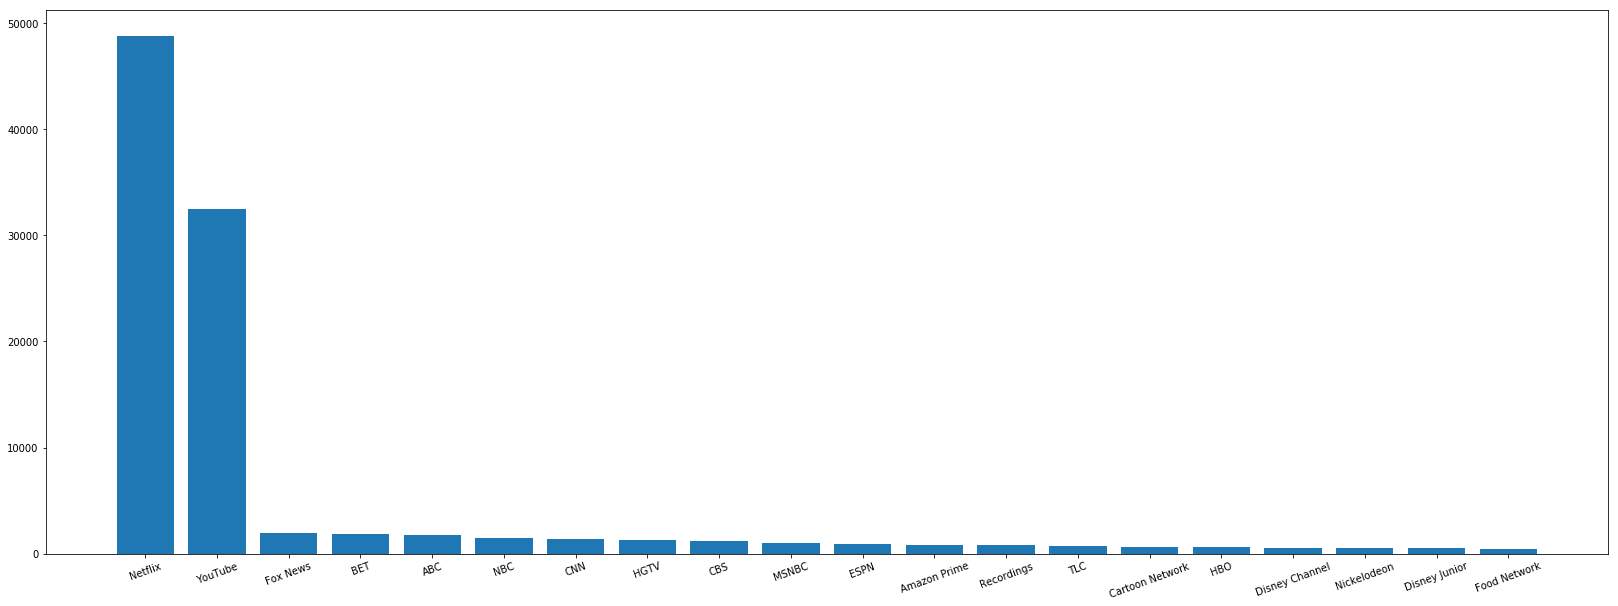

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
counted_query = Counter(all_query)
plot_freq(counted_query,20)

In [148]:
print("unique number of queries: %d" %(len(counted_query)))
print("unique number of queries percentage: %f " %(len(counted_query)/len(json_data)))

unique number of queries: 15829
unique number of queries percentage: 0.105118 


### Company Name Top Freq

In [288]:
all_company = [0]*len(dataset)
for idx,each in enumerate(dataset):
    all_company[idx] = each[1]

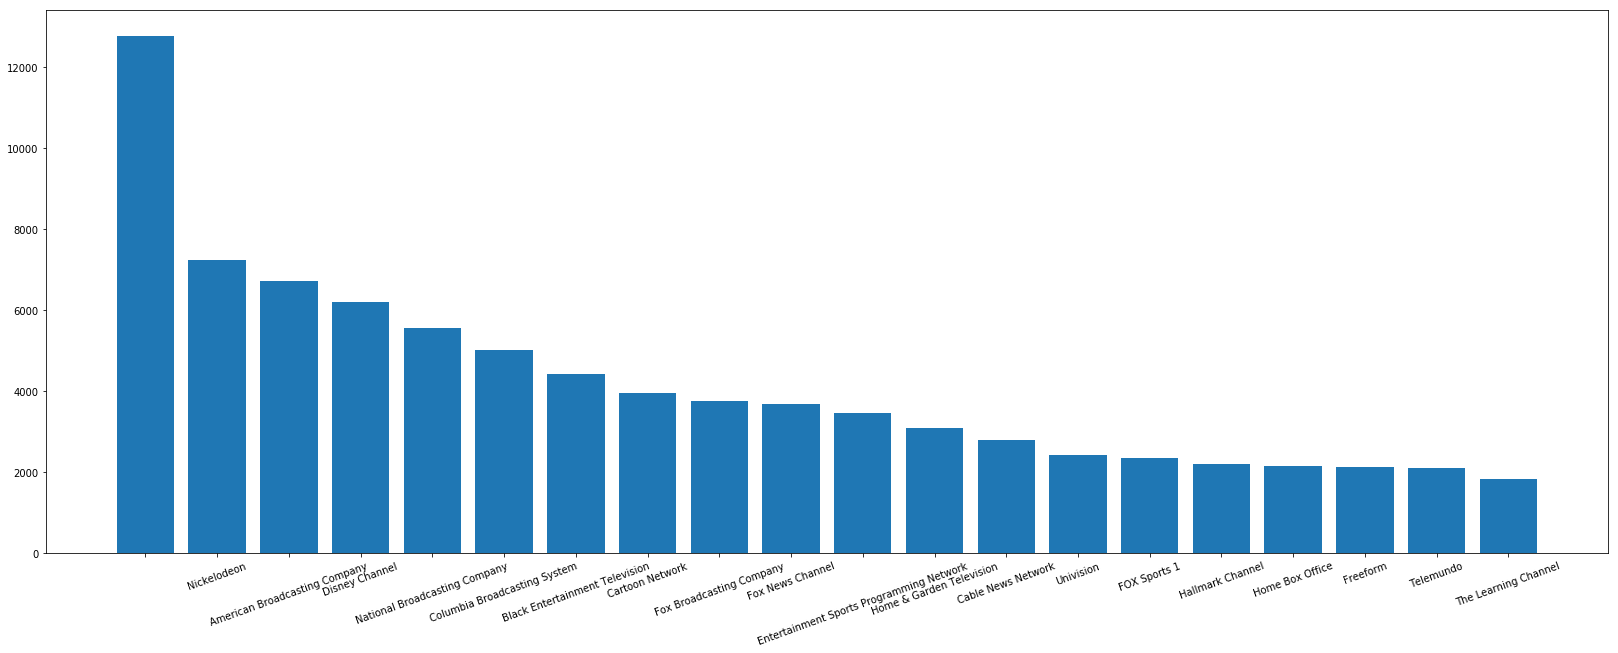

In [289]:
counted_company = Counter(all_company)
plot_freq(counted_company,20)

In [290]:
print("unique number of company: %d" %(len(counted_company)))
print("unique number of company percentage: %f " %(len(counted_company)/len(json_data)))

unique number of company: 324
unique number of company percentage: 0.002152 


### Program Name Top Freq

In [296]:
all_program = [0]* len(dataset)
for idx,each in enumerate(dataset):
    all_program[idx] = each[2]

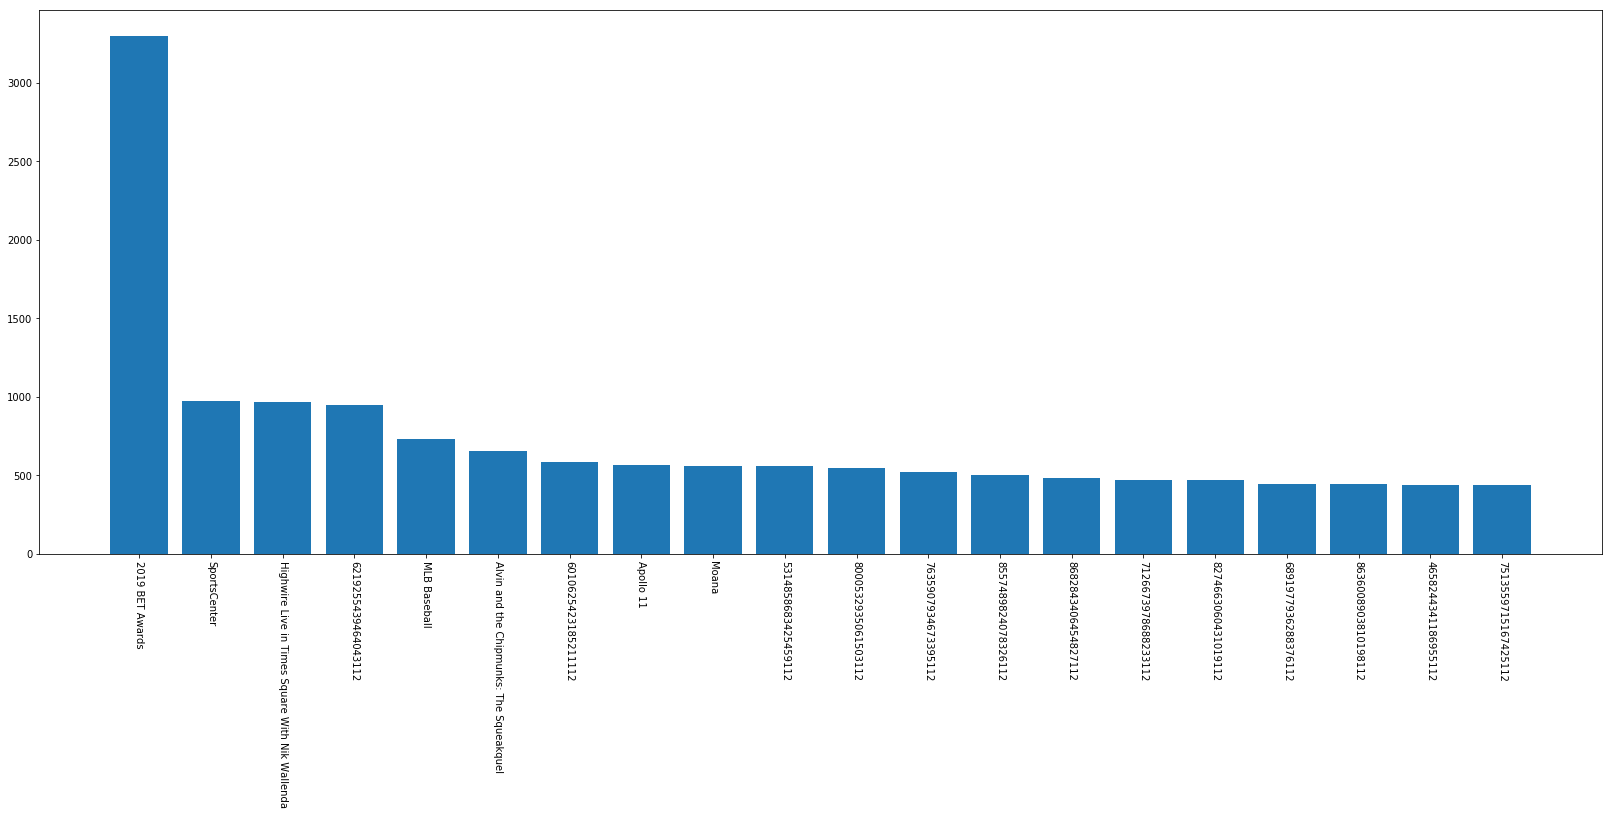

In [297]:
counted_program = Counter(all_program)
plot_freq(counted_program,20,270)

In [299]:
print("unique number of program: %d" %(len(counted_program)))
print("unique number of program percentage: %f " %(len(counted_program)/len(json_data)))

unique number of program: 13653
unique number of program percentage: 0.090668 


### Query -> Company

In [261]:
def data_alloc(idx1,idx2):
    tmp = defaultdict(lambda: defaultdict(int))
    for i in range(len(dataset)):
        queries = dataset[i][idx1]
        to = dataset[i][idx2]
        if isinstance(queries,list):
            n = len(queries)-1
            queries = queries[n]
        if isinstance(to,list):
            to = to[0]
        n = len(queries)-1
        tmp[queries][to] +=1
    return tmp
    
def plot(data, key, title, tilt=20):
    data = Counter(dict(data[key]))
#     print(data)
    plot_freq(data,20,tilt,title)

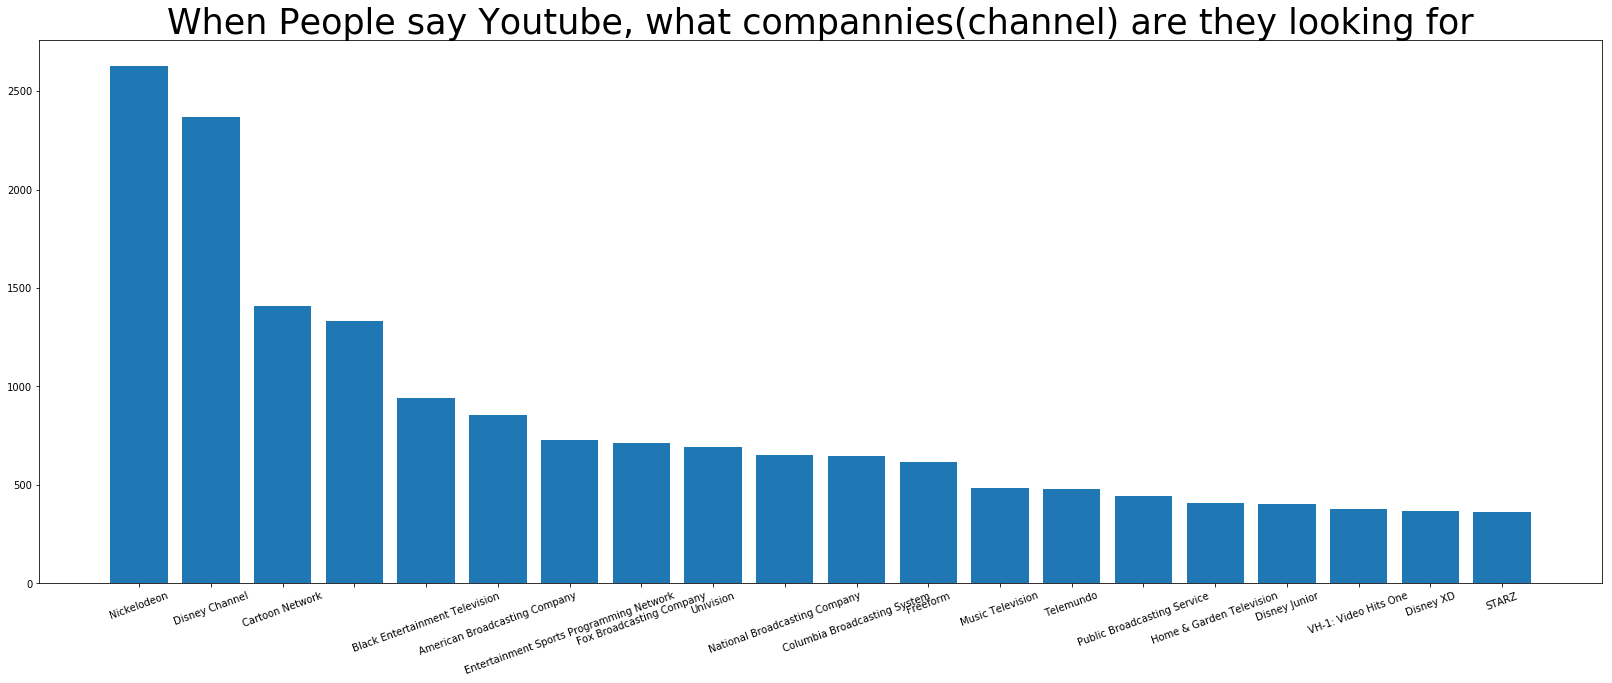

In [210]:
# prepare data
# 0: query; 1: company; 2: program
from collections import defaultdict
query2company = data_alloc(0,1)
var1 = "YouTube"
title = "When People say Youtube, what compannies(channel) are they looking for"
plot(query2company,var1,title)

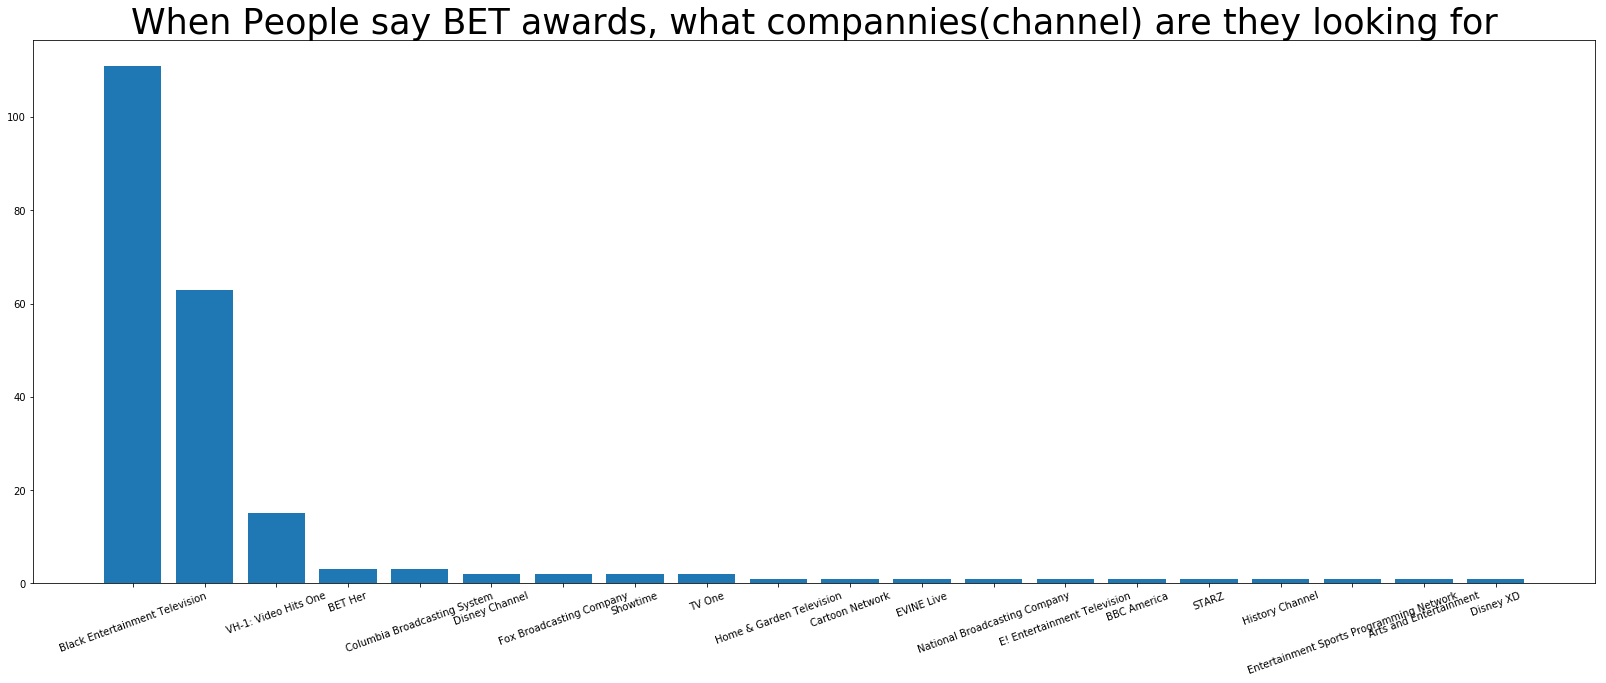

In [303]:
var1 = "BET awards"
title = "When People say BET awards, what compannies(channel) are they looking for"
plot(query2company,var1,title)

Counter({'Columbia Broadcasting System': 1185, 'MeTV': 2, 'National Broadcasting Company': 2, 'Hallmark Channel': 1, 'MSNBC': 1, 'Lifetime Networks': 1, 'Home & Garden Television': 1, '': 1})


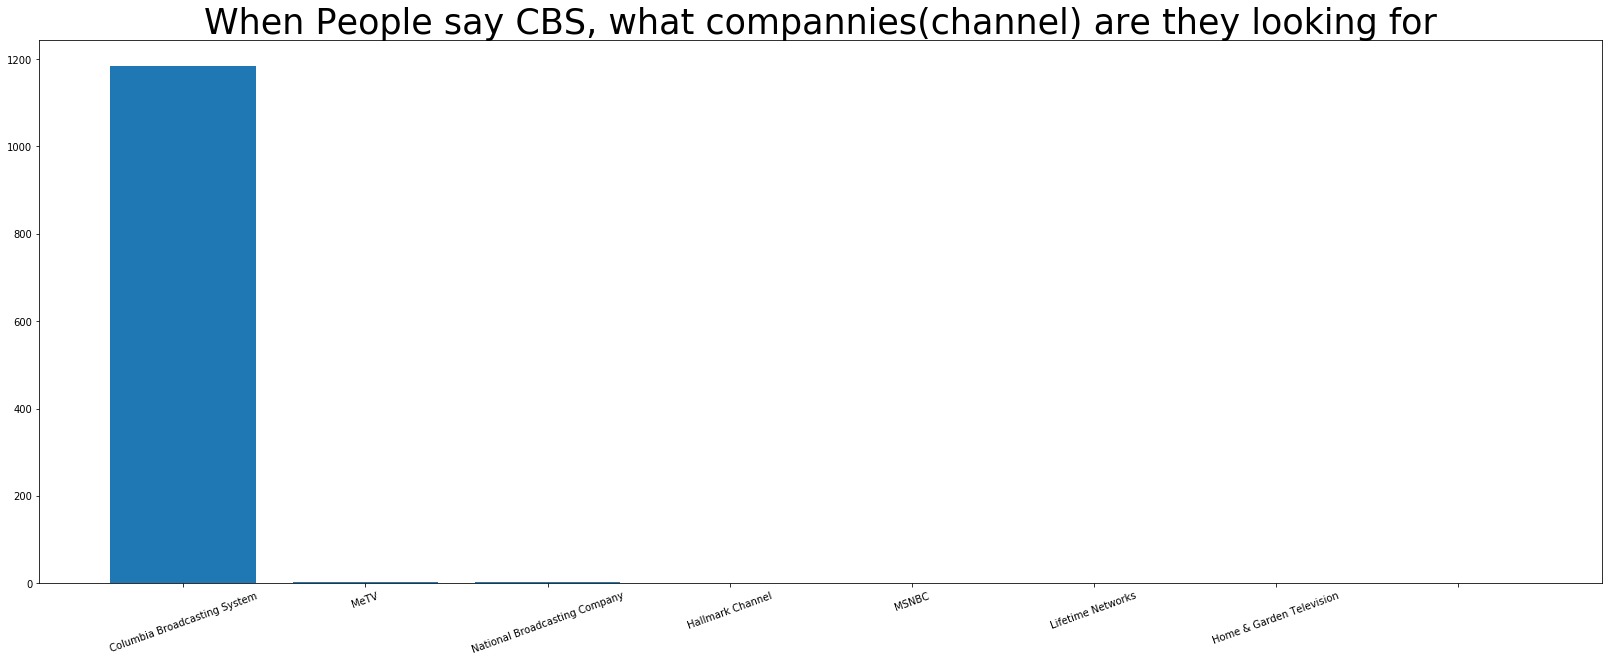

In [205]:
var1 = "CBS"
title = "When People say CBS, what compannies(channel) are they looking for"
plot(query2company,var1,title)

Counter({'Home Box Office': 573, 'E! Entertainment Television': 1, 'SYFY': 1, 'FOX Sports Net': 1, 'Hallmark Channel': 1, 'Music Television': 1})


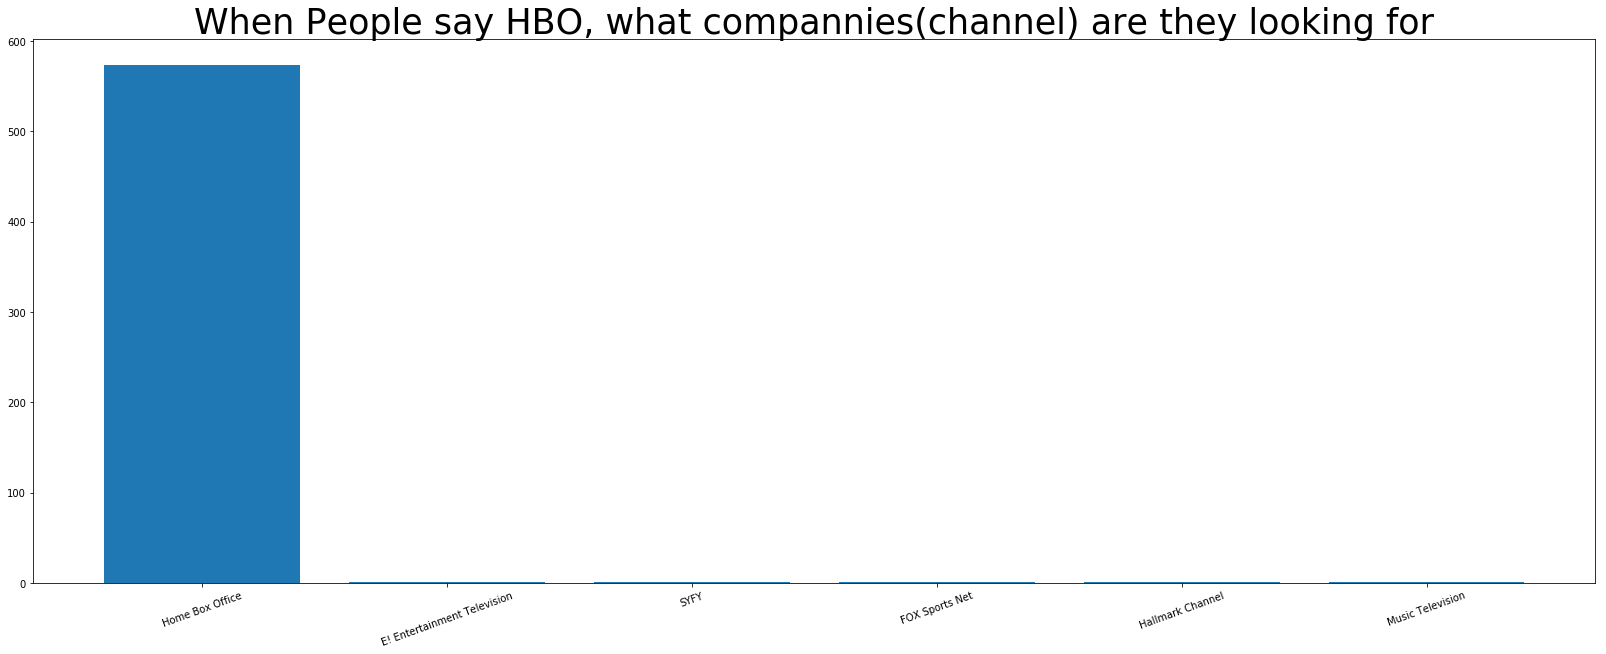

In [206]:
var1 = "HBO"
title = "When People say %s, what compannies(channel) are they looking for"%(var1)
plot(query2company,var1,title)

### Query -> Program

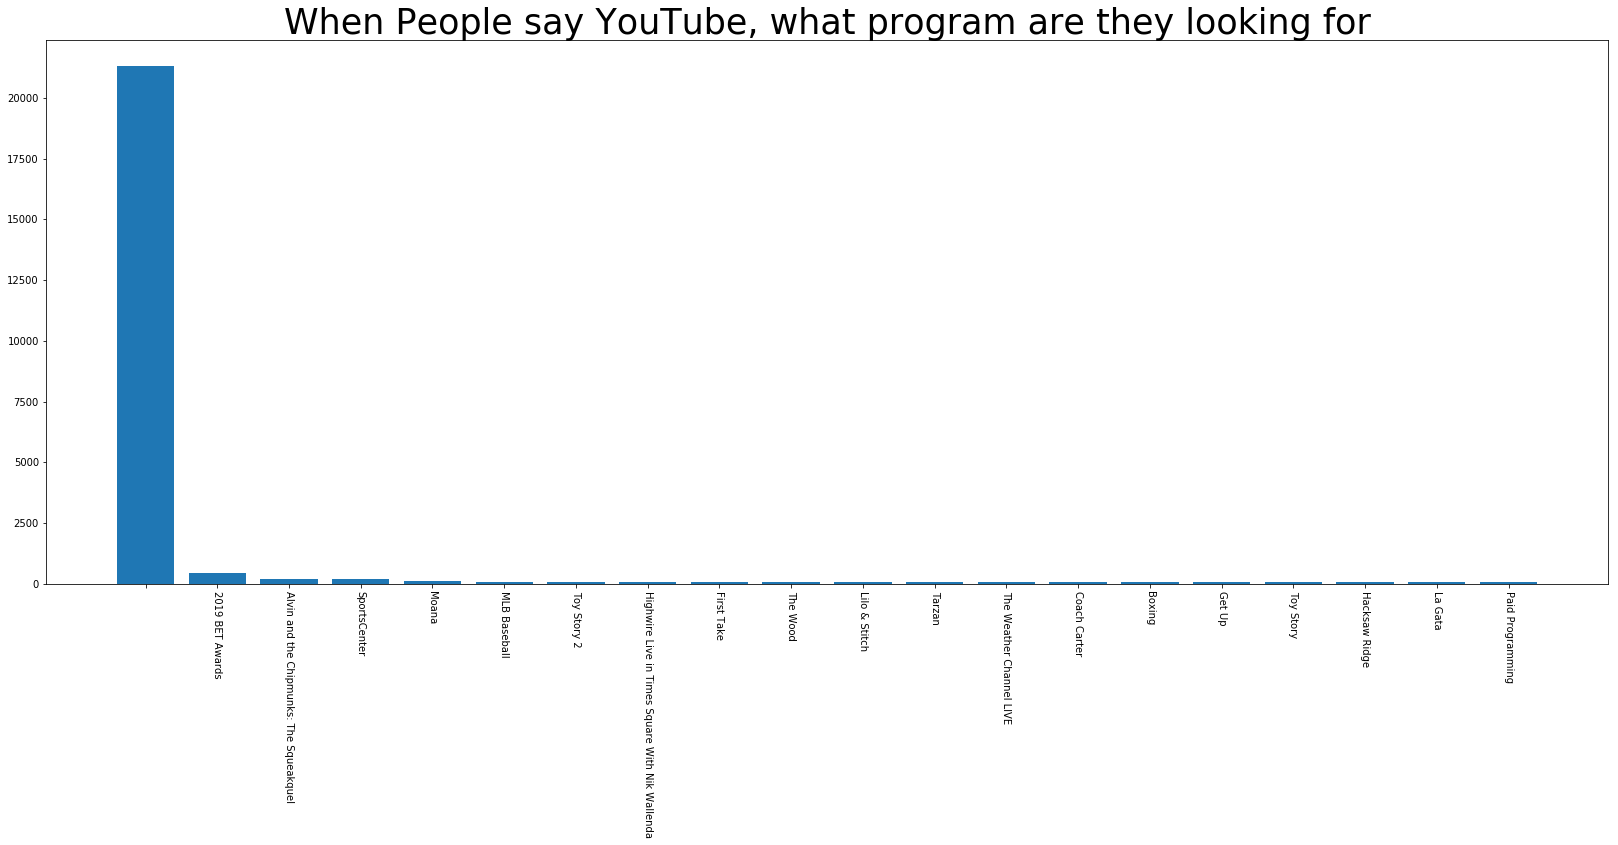

In [214]:
query2program = data_alloc(0,2)
var1 = "YouTube"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

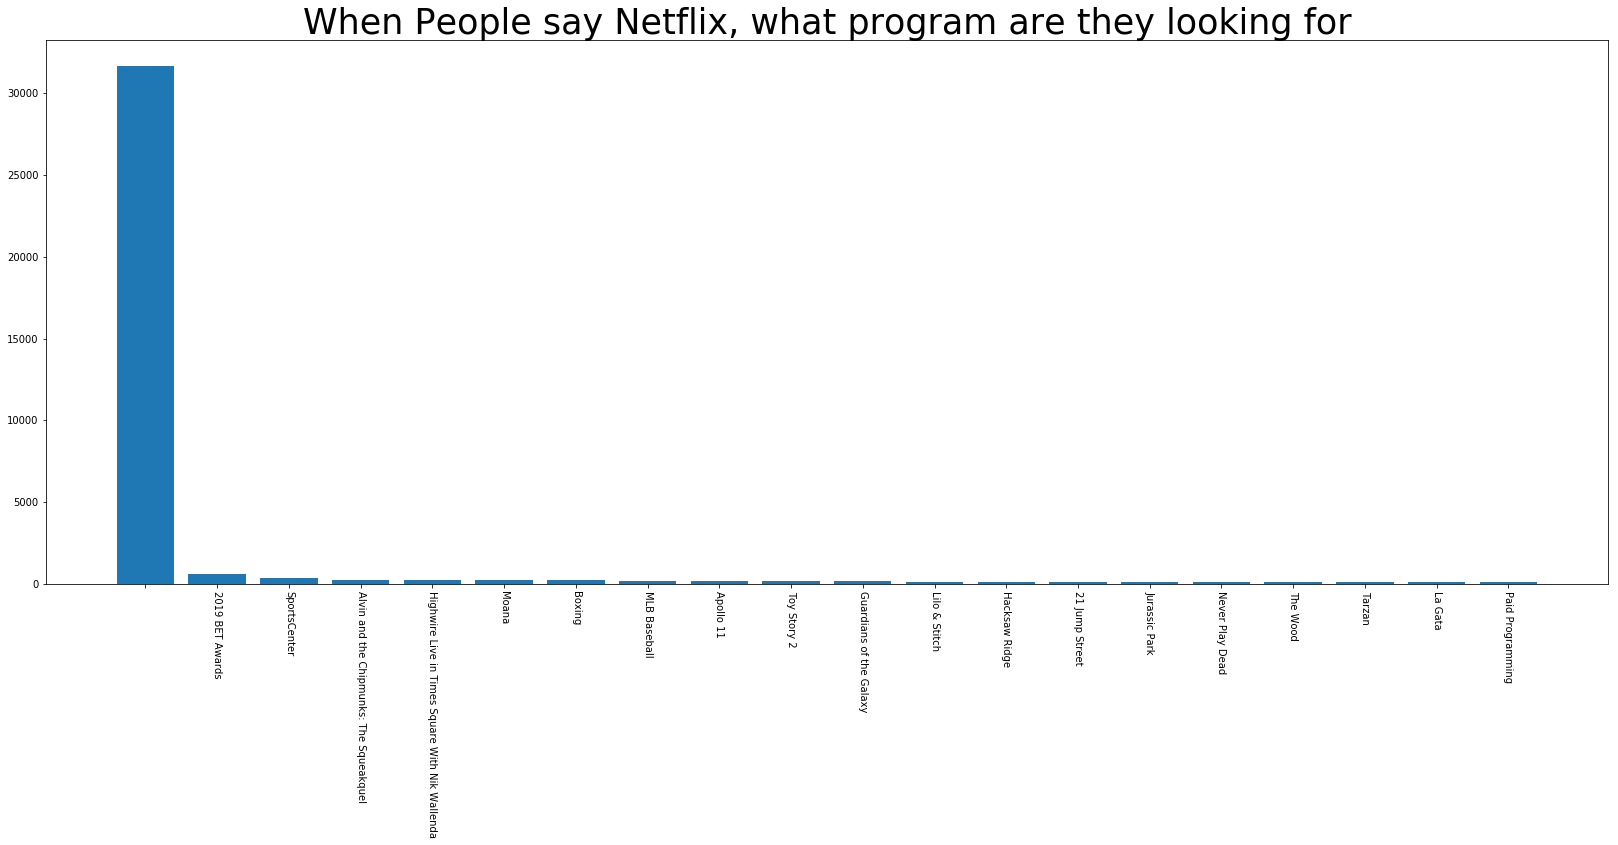

In [215]:
var1 = "Netflix"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

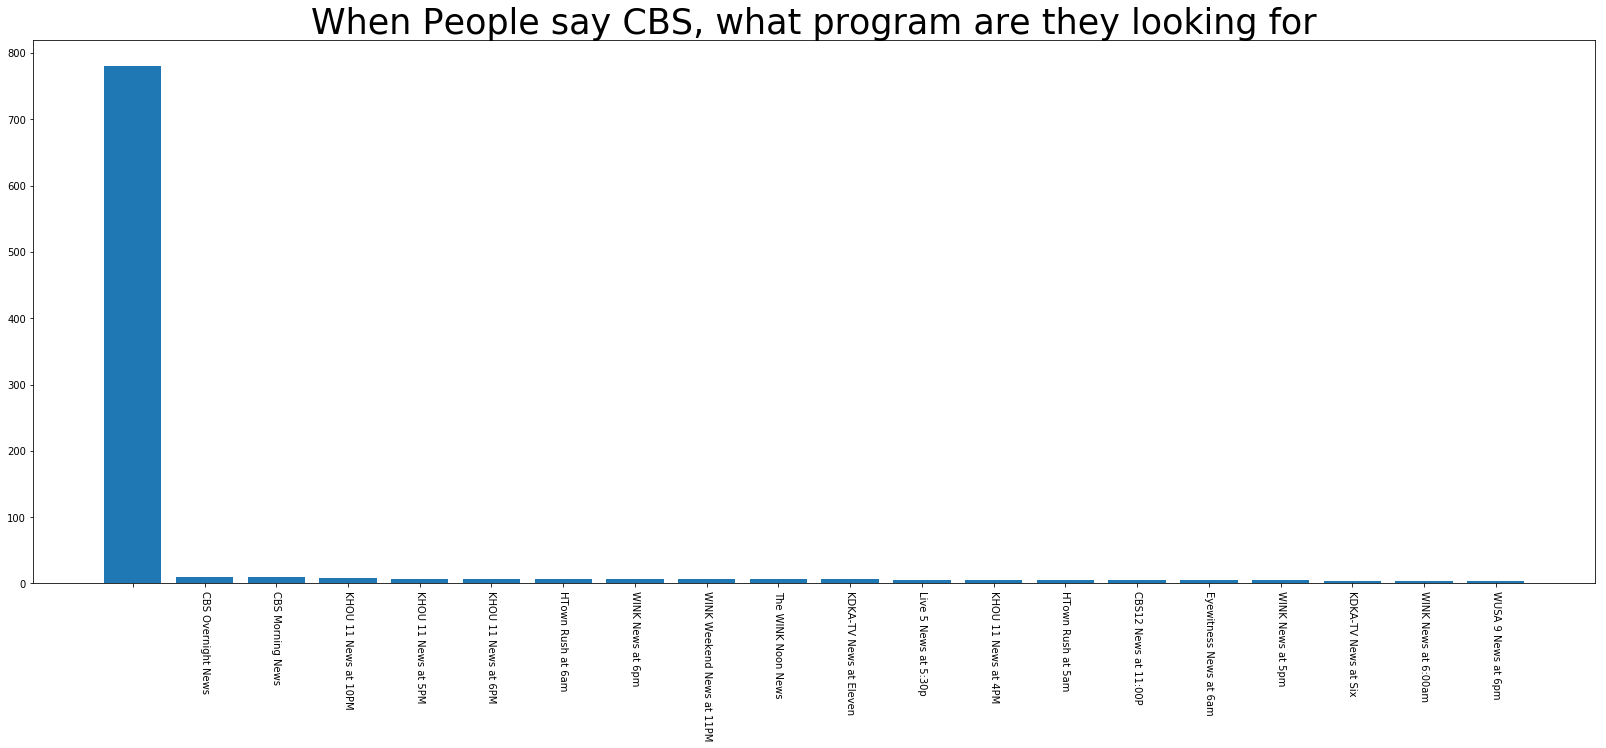

In [216]:
var1 = "CBS"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

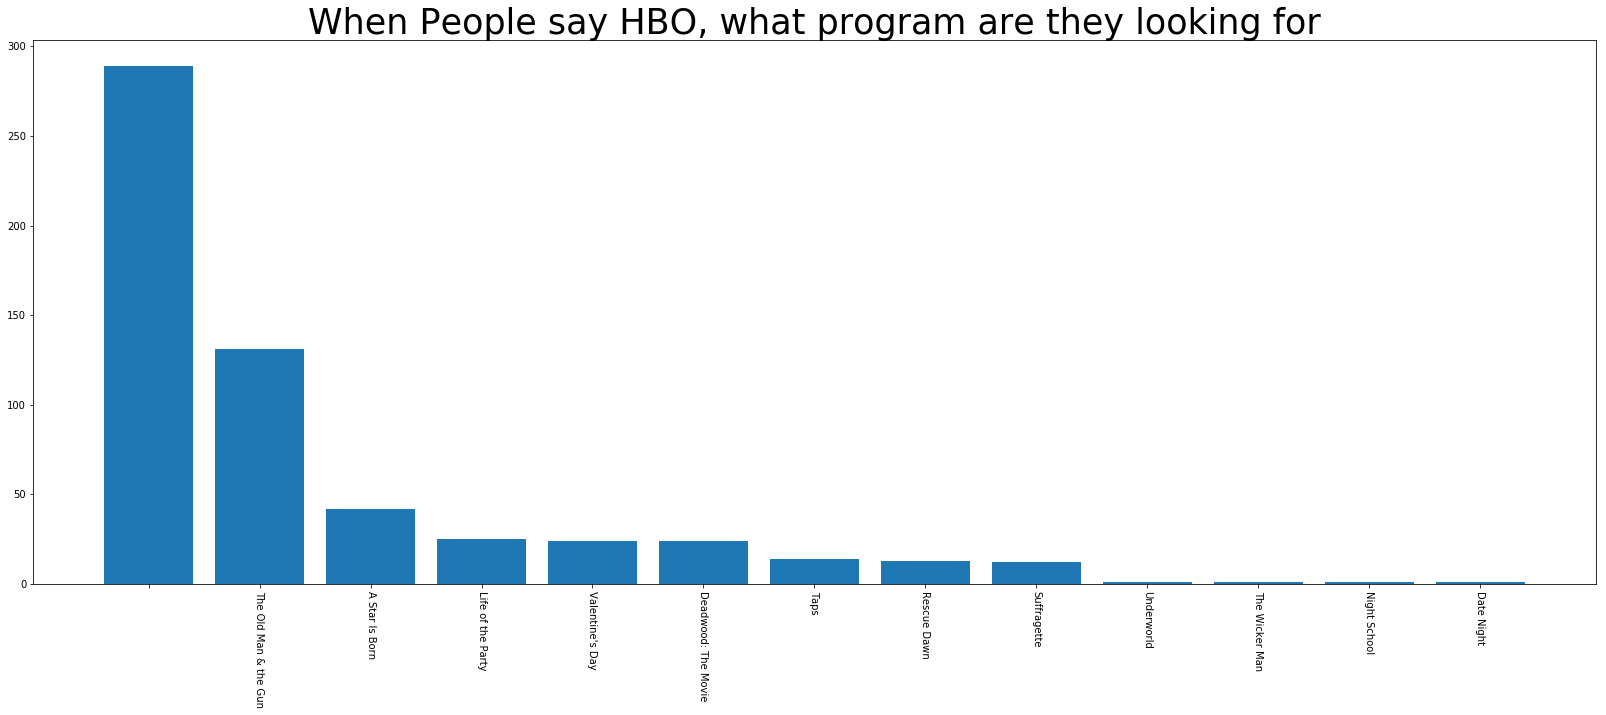

In [217]:
var1 = "HBO"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

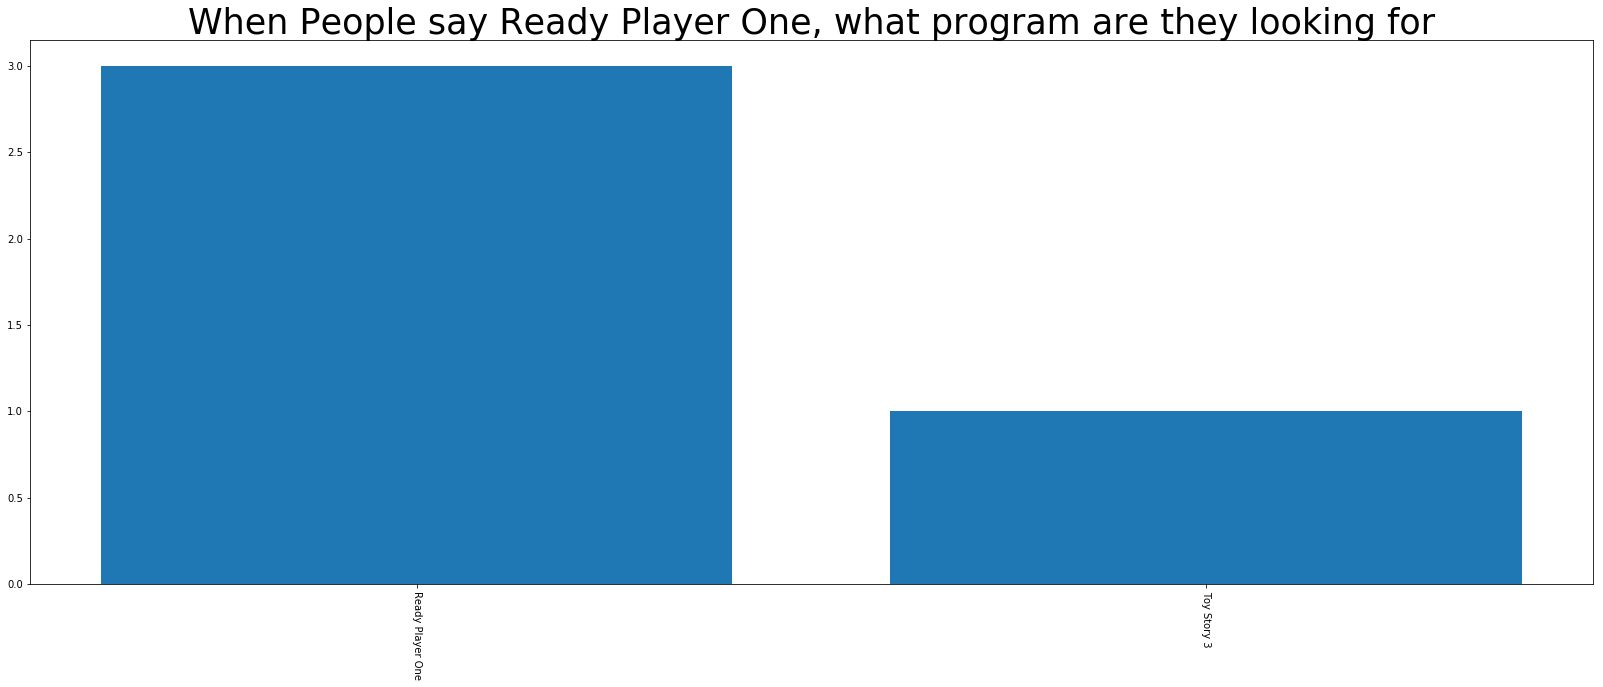

In [222]:
var1 = "Ready Player One"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

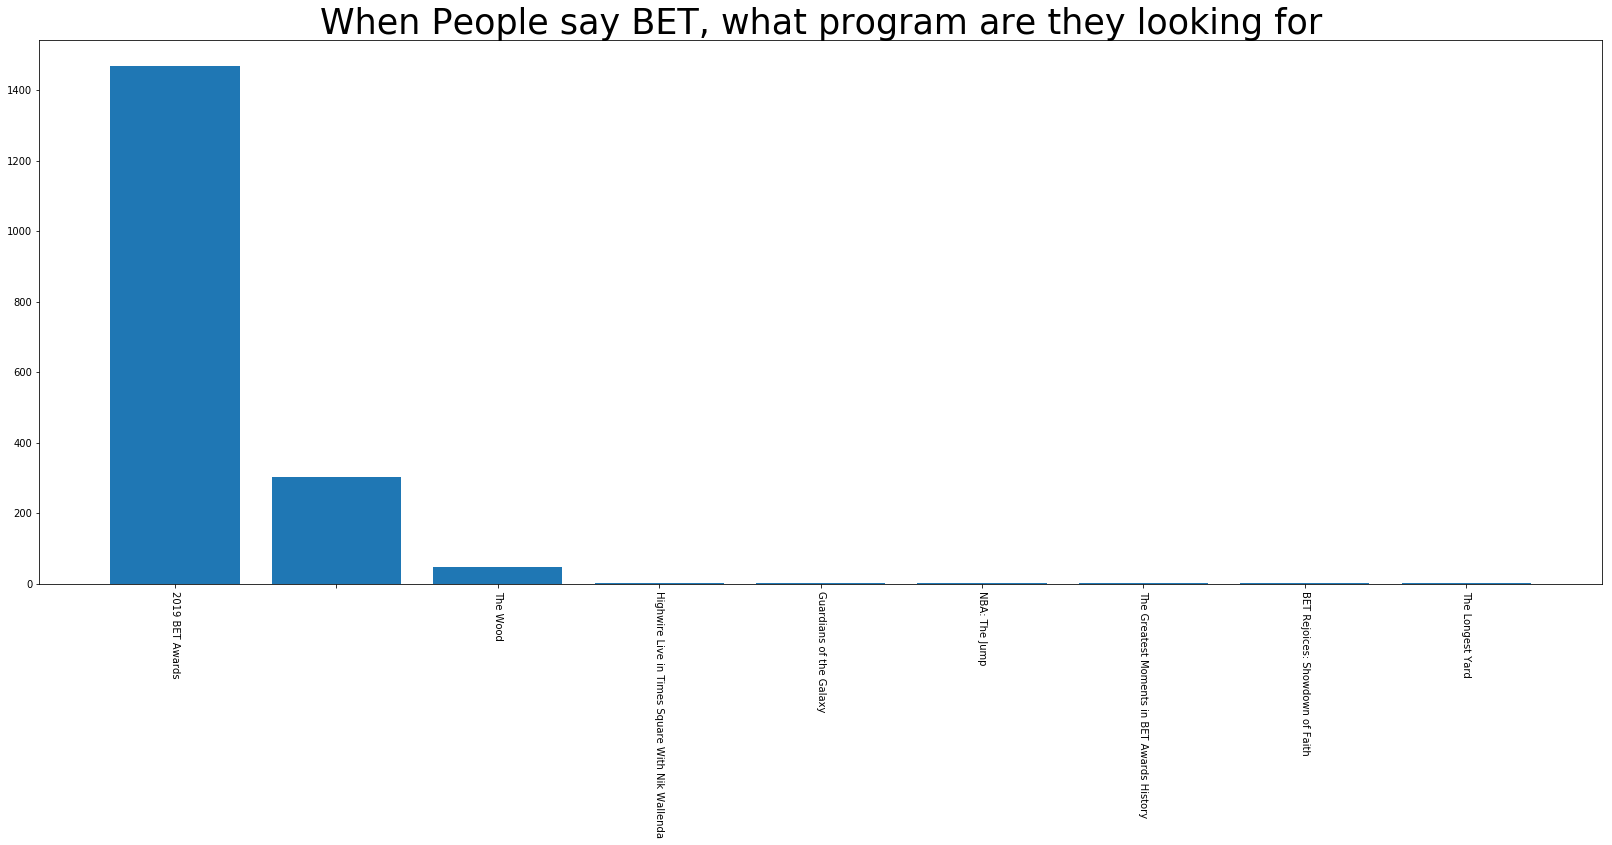

In [223]:
var1 = "BET"
title = "When People say %s, what program are they looking for"%(var1)
plot(query2program,var1,title,270)

### Company -> Program

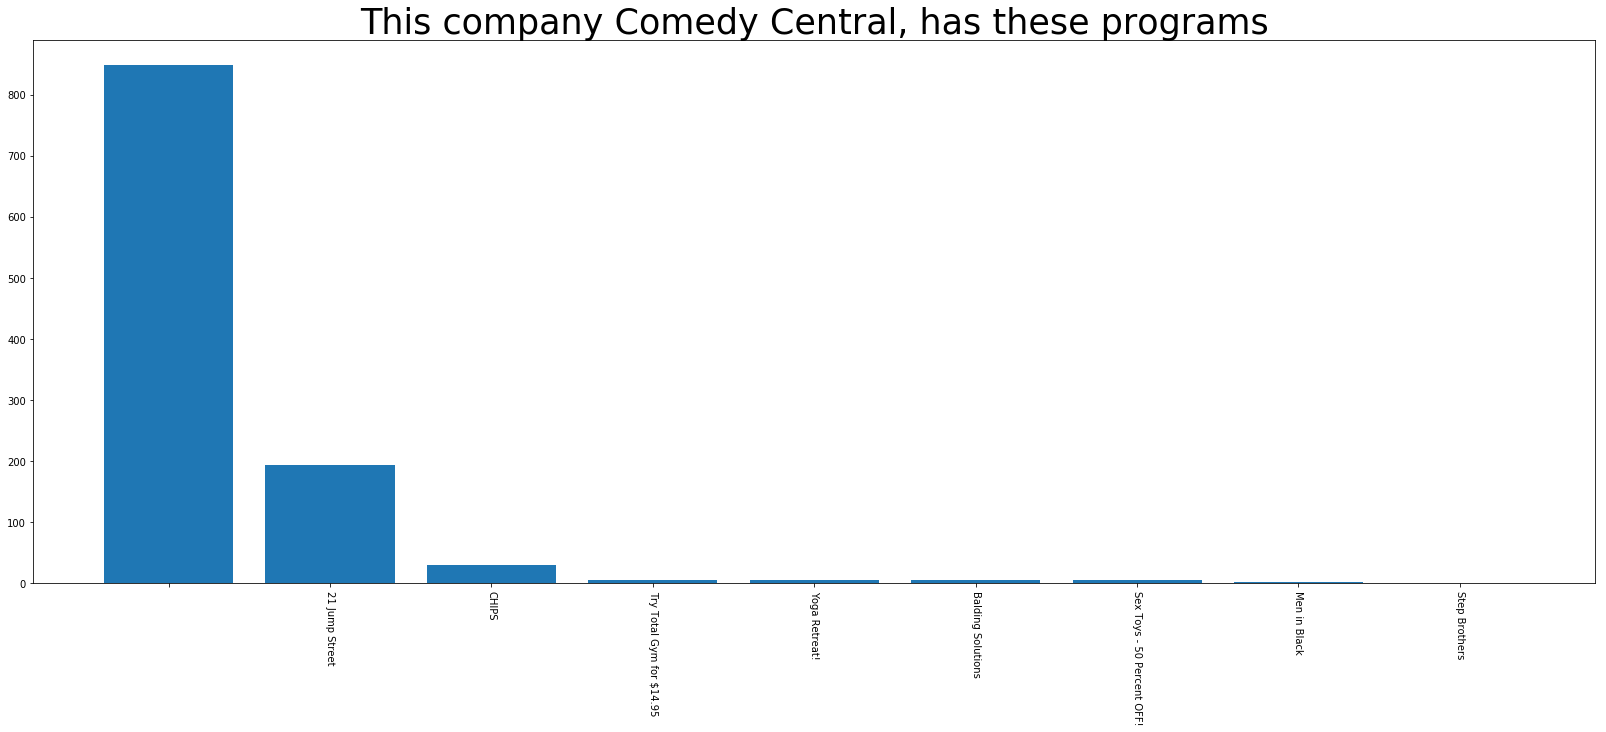

In [241]:
company2program = data_alloc(1,2)
var1 = "Comedy Central"
title = "This company %s, has these programs"%(var1)
plot(company2program,var1,title,270)

In [229]:
counted_company

Counter({'Fox Broadcasting Company': 3748,
         'Fox News Channel': 3696,
         'American Broadcasting Company': 6733,
         'Hallmark Channel': 2202,
         'Columbia Broadcasting System': 5016,
         'Independent Broadcasters': 749,
         'USA Network': 1367,
         'Primo TV': 13,
         'The Filipino Channel': 373,
         'Public Broadcasting Service': 1631,
         'Entertainment Sports Programming Network': 3460,
         'STARZ': 1693,
         'Nickelodeon': 7251,
         'The CBS-Warner Network': 1180,
         '': 12774,
         'Home Box Office': 2149,
         'Black Entertainment Television': 4431,
         'Disney Channel': 6203,
         'Music Television': 1524,
         'Telemundo': 2106,
         'FOX Sports Net': 259,
         'FX': 1024,
         'Music Choice': 1173,
         'UniMás': 543,
         'Home & Garden Television': 3105,
         'Discovery Family': 145,
         'BBC America': 356,
         'History Channel': 1425,
         '

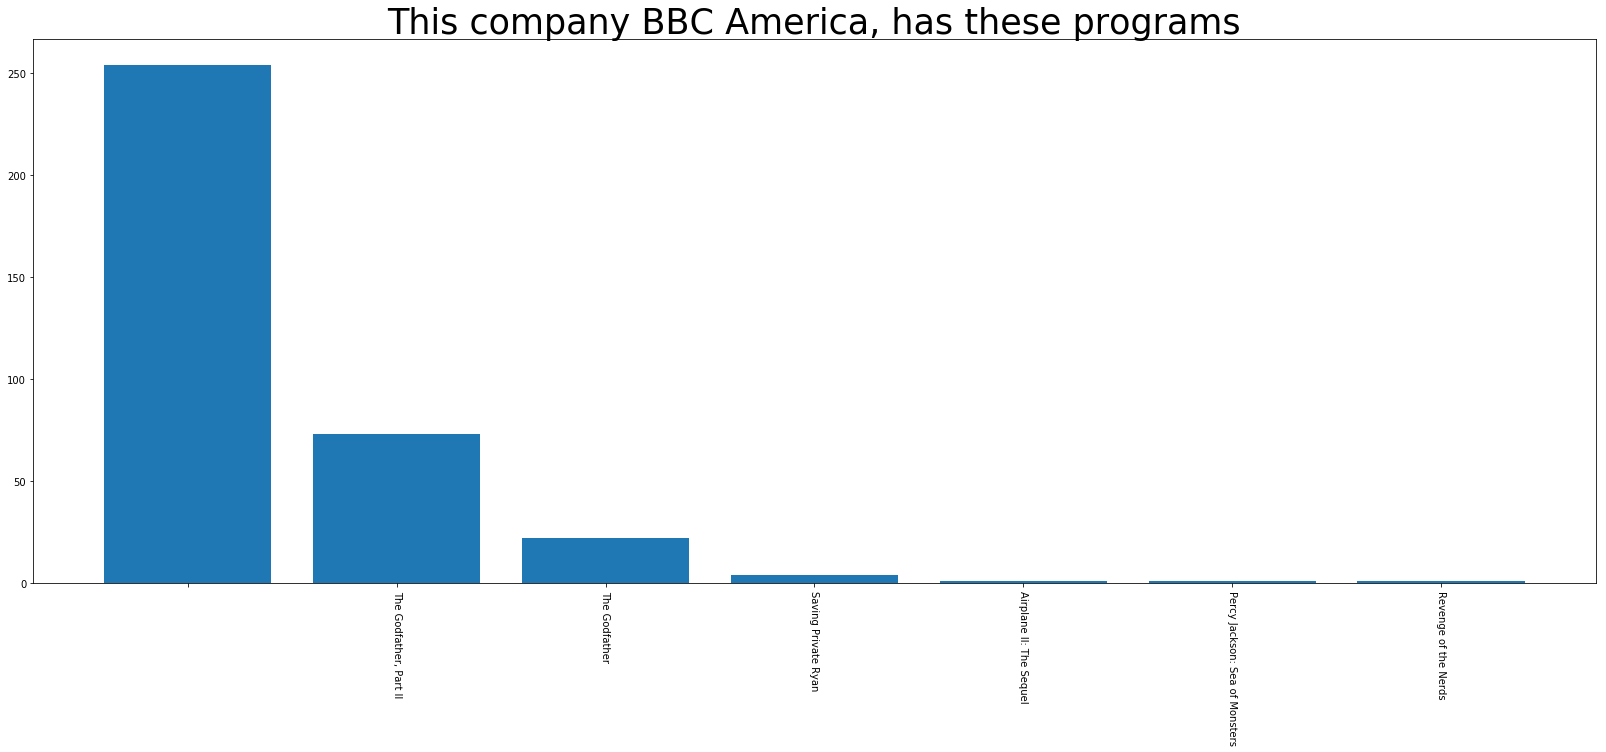

In [230]:
var1 = "BBC America"
title = "This company %s, has these programs"%(var1)
plot(company2program,var1,title,270)

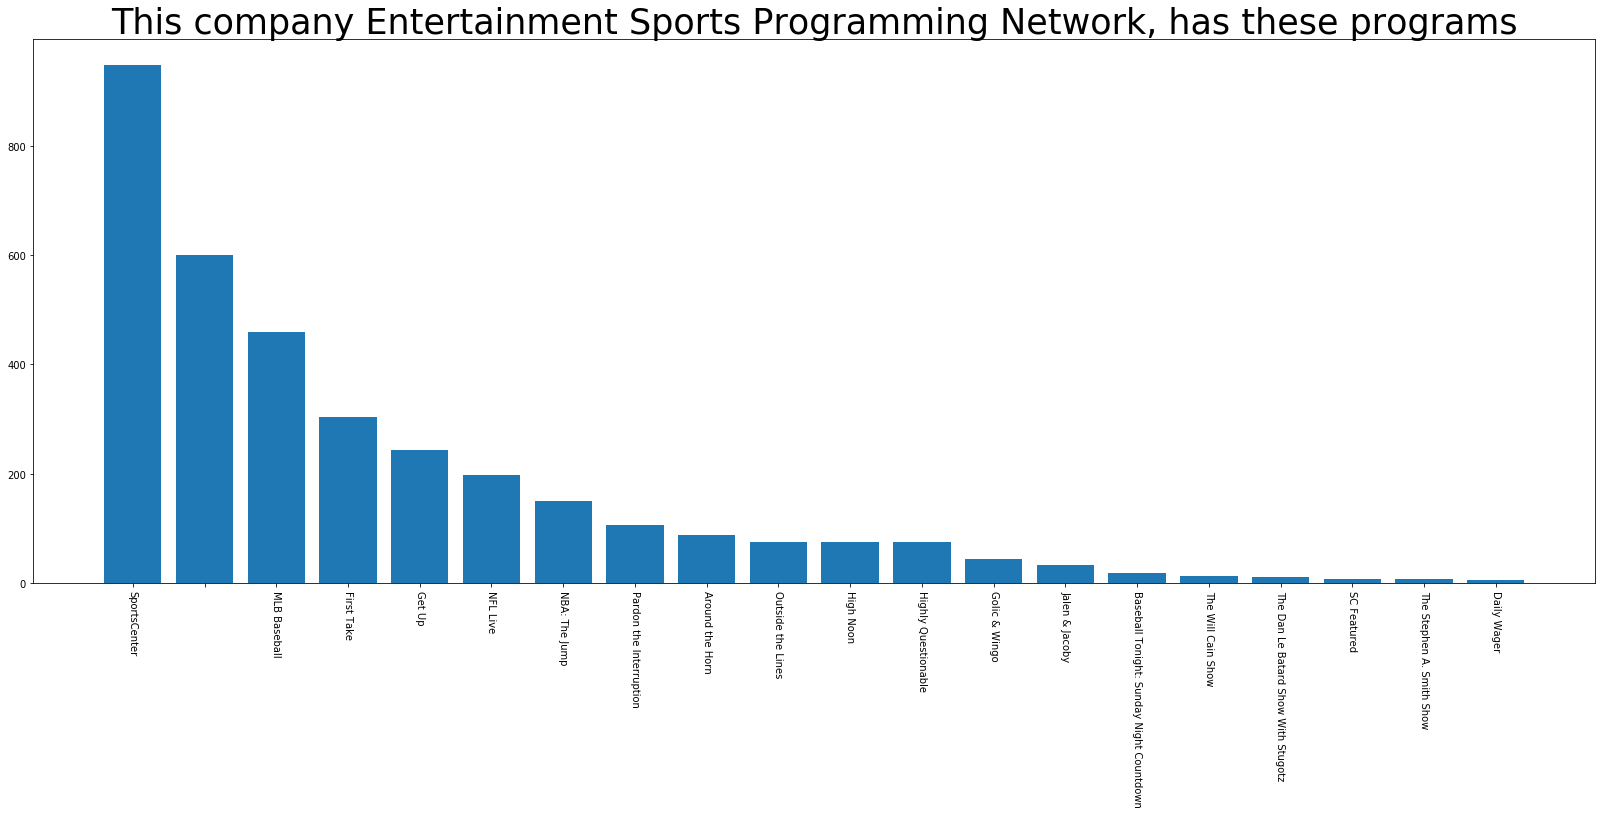

In [264]:
var1 = "Entertainment Sports Programming Network"
title = "This company %s, has these programs"%(var1)
plot(company2program,var1,title,270)

### Program -> Query

In [266]:
counted_program

Counter({'': 102870,
         'Action News 6PM': 34,
         '7 News Today in New England': 36,
         "FPJ's Ang Probinsyano": 11,
         'NBA: The Jump': 150,
         'The Front Runner': 60,
         'Daybreak at 7am': 2,
         'Love & Other Drugs': 5,
         'The Wood': 267,
         'The X-Files: I Want to Believe': 35,
         'SportsCenter': 974,
         '2019 BET Awards': 3298,
         'FOX2 News Morning: The Nine': 27,
         'The Wedding Singer': 30,
         'A Walk Among the Tombstones': 81,
         'Music Choice Solid Gold Oldies': 34,
         '7 Action News at 5pm': 12,
         'Public Access': 7,
         'Moana': 559,
         'Eight Below': 3,
         'Ratatouille': 3,
         'Los tres mosqueteros': 19,
         'María Mercedes': 16,
         'Doña Flor y sus dos maridos': 118,
         'CBS 13 News at 4p': 4,
         'The Last Bridesmaid': 48,
         'Run All Night': 134,
         'Boxing': 411,
         'The Golf Scene': 1,
         'Have Thin

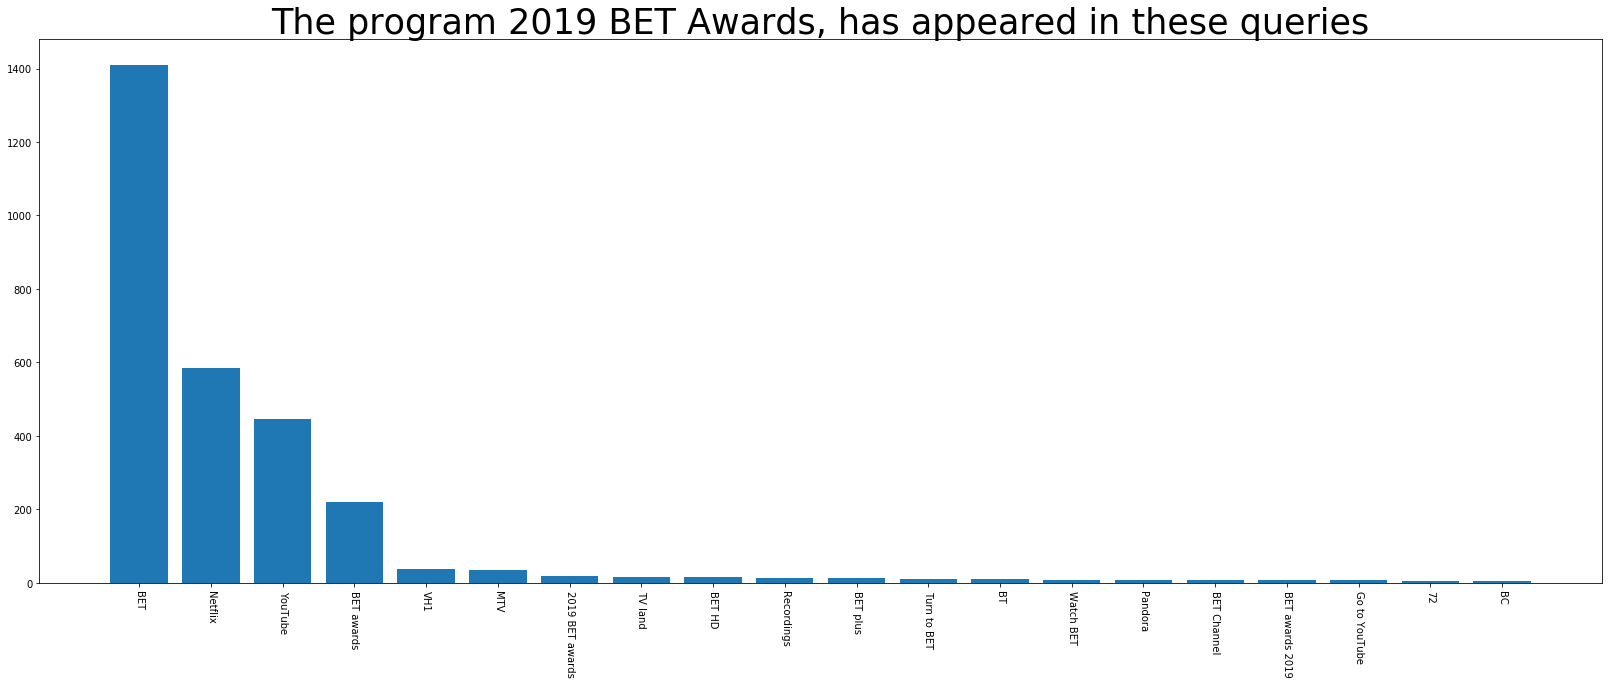

In [270]:
program2query = data_alloc(2,0)
var1 = "2019 BET Awards"
title = "The program %s, has appeared in these queries"%(var1)
plot(program2query,var1,title,270)

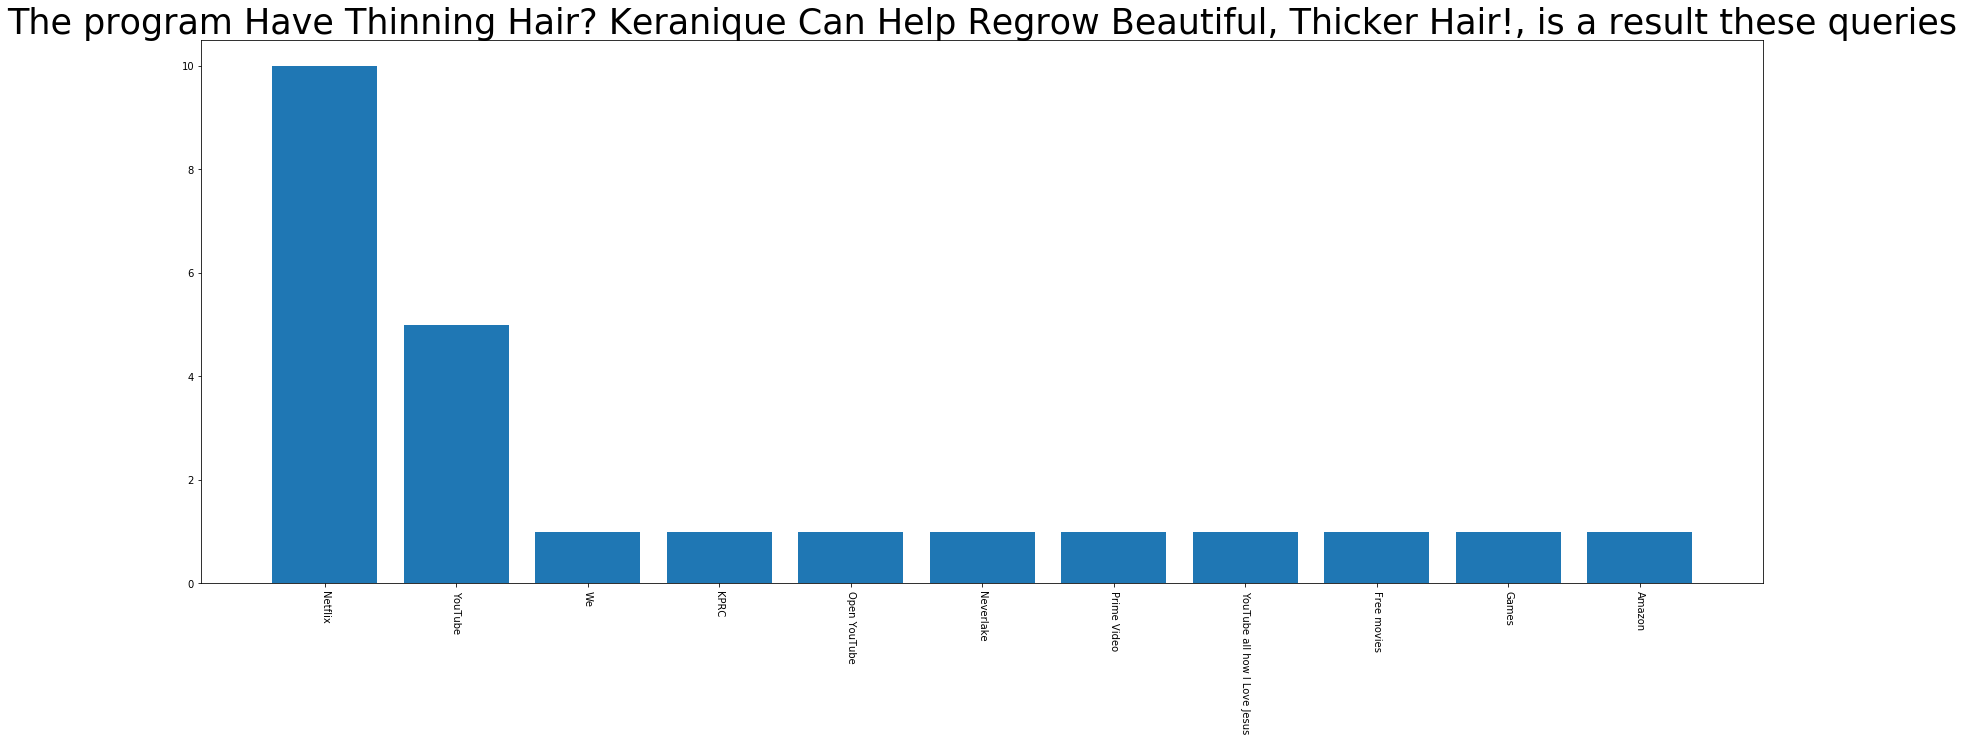

In [273]:
var1 = "Have Thinning Hair? Keranique Can Help Regrow Beautiful, Thicker Hair!"
title = "The program %s, is a result these queries"%(var1)
plot(program2query,var1,title,270)

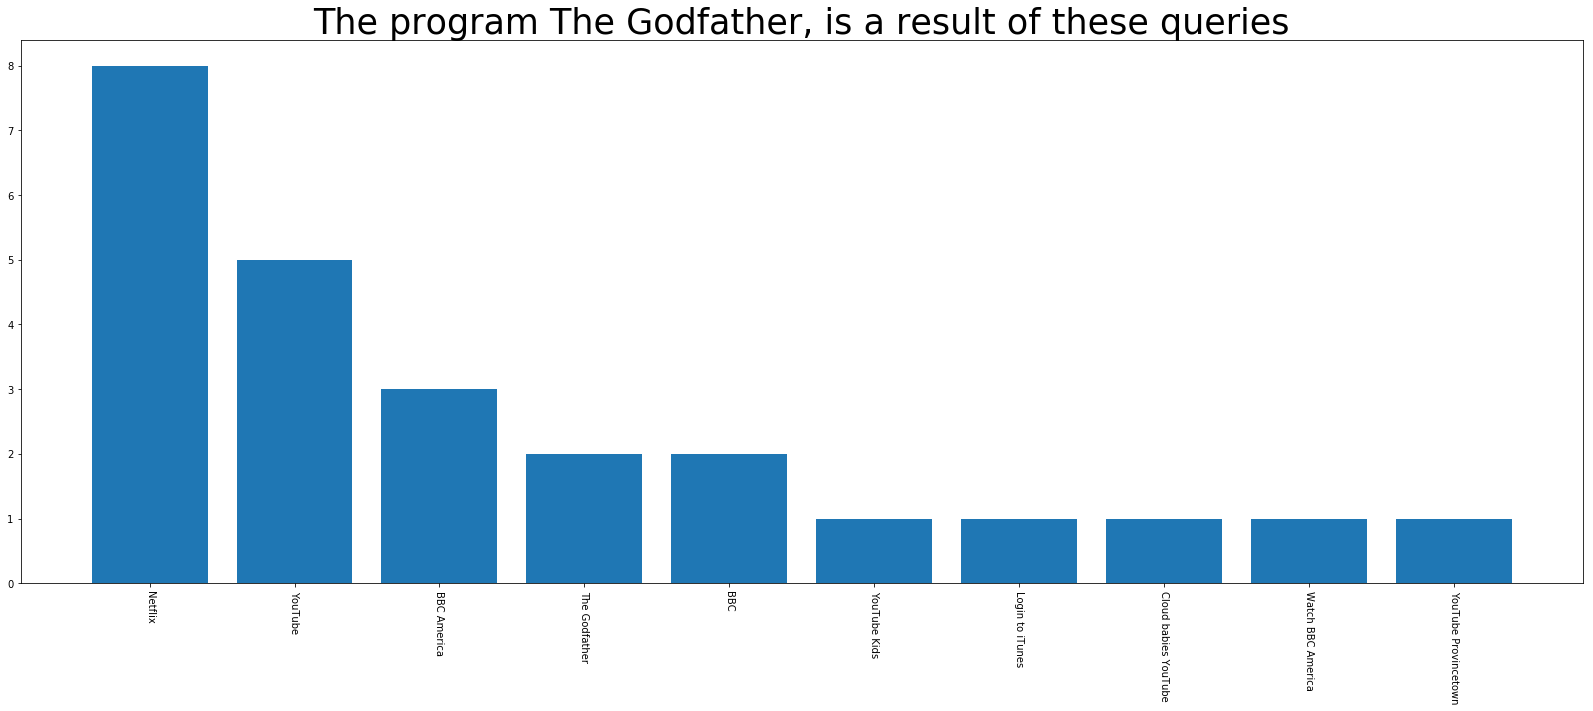

In [272]:
var1 = "The Godfather"
title = "The program %s, is a result of these queries"%(var1)
plot(program2query,var1,title,270)